### 1. Which Subgroup has the most outbreaks? Which subgroup has the least?

In [1]:
#importing used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
#loading the data using pandas
df = pd.read_csv('ongoing_outbreaks.csv')
second_df = pd.read_csv('cases_by_age_vac_status.csv')

#preview of the data
df

,date,outbreak_group,outbreak_subgroup,number_ongoing_outbreaks
0,2020-11-01,1 Congregate Care,1 Long-Term Care Homes,73
1,2020-11-01,1 Congregate Care,2 Hospitals,21
2,2020-11-01,1 Congregate Care,3 Retirement Homes,51
3,2020-11-01,2 Congregate Living,18 Short-term accommodations,2
4,2020-11-01,2 Congregate Living,4 Group Home/Supportive Housing,31
...,...,...,...,...
8080,2021-10-28,4 Workplace,16 Medical/Health Service,1
8081,2021-10-28,5 Recreational,17 Bar/restaurant/nightclub,8
8082,2021-10-28,5 Recreational,19 Recreational fitness,2
8083,2021-10-28,5 Recreational,21 Other recreation,8


There are a total of 28 outbreak Subgroups. Out of them all, the one with the most outbreaks is the Workplace Subgroup. The subgroup with the least outbreaks is the "camp-Overnight"

In [2]:
## Part 1
df1 = df.groupby('outbreak_subgroup')['number_ongoing_outbreaks'].sum()
df1 = df1.sort_values(ascending=True)
df1.tail(9)


outbreak_subgroup
21 Other recreation                 5319
15 Retail                           6751
2 Hospitals                         9946
4 Group Home/Supportive Housing    11519
3 Retirement Homes                 15281
11 Child care                      16029
7 School - Elementary              16564
1 Long-Term Care Homes             25905
14 Workplace - Other               36403
Name: number_ongoing_outbreaks, dtype: int64

<AxesSubplot:title={'center':'Outbreaks per subgroup'}, xlabel='outbreak', ylabel='outbreak_subgroup'>

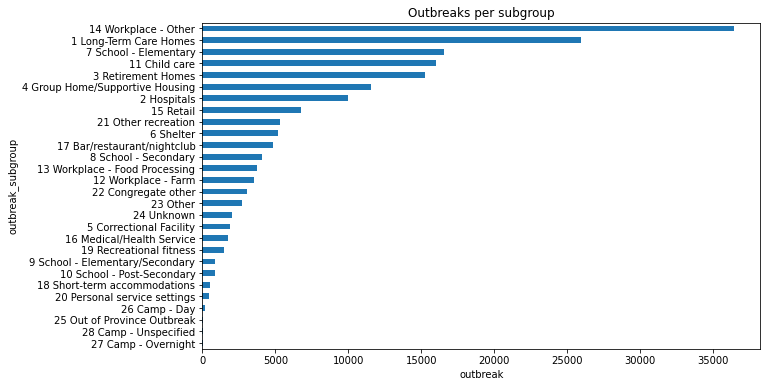

In [3]:
#Graphical representation
sub_groups = df.outbreak_subgroup.unique()
plt.figure(figsize=(10,6))
plt.xlabel('outbreak')#labelling axis
plt.ylabel("outbreak_subgroup")
plt.title("Outbreaks per subgroup")

df1.plot.barh()

## 2 & 3 . According to the data, which group has been the most affected by covid-19?

In [4]:
groups = df.outbreak_group.unique()
groups

array(['1 Congregate Care', '2 Congregate Living', '3 Education',
       '4 Workplace', '5 Recreational', '6 Other/Unknown',
       '7 Out of Province Outbreak'], dtype=object)

In [5]:
df3 = df.groupby('outbreak_group')['number_ongoing_outbreaks'].sum()
df3 = df3.sort_values(ascending=True)
df3

outbreak_group
7 Out of Province Outbreak       62
6 Other/Unknown                4755
5 Recreational                12081
2 Congregate Living           22179
3 Education                   38581
1 Congregate Care             51132
4 Workplace                   52197
Name: number_ongoing_outbreaks, dtype: int64

There are 7 groups concluded in this data file. Within the 7, the group most affected by covid-19 was the workplace category.
### The top 3 concluded as the following:
    1. Workplace
    2. Congregate living
    3. School
### Here are our following reasoning as to why the following had happened:
    
   ### Workplace: 
   The workplace is an easy way to spread covid-19 as everyone is in close proximity to one another and are around people that are not part of their family.That means that even though none of your family members have gotten covid, your co-worker could possibly give it to you as you have no clue if they have been around an infected person or not.
   ### Congregate Living: 
   Congregate Living refers to group living. This was the second most affected group by covid-19. This could 
        possibly be because roomates are not following social distancing protocals and it could also be because each roomate has their own family meaning that they come in contact with more people as compared to a family household.
   ### Education:   
   This is the third most affected by covid-19 as students are in very close proximty to one another. Alot of younger kids
        might not be following social distancing protocals leading to the increase of transmission.

<AxesSubplot:title={'center':'Outbreaks per group'}, xlabel='outbreak', ylabel='outbreak_group'>

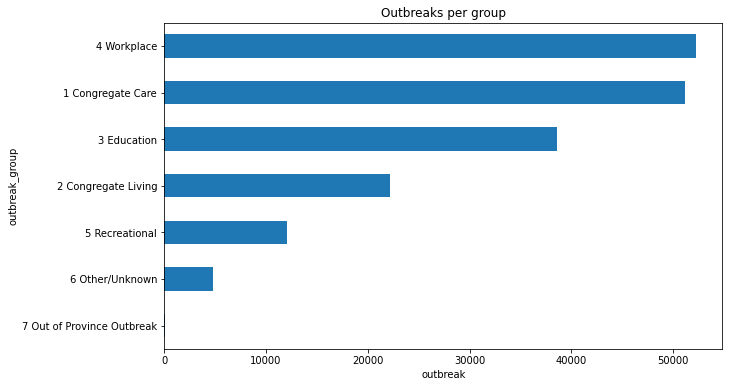

In [6]:

plt.figure(figsize=(10,6))
plt.xlabel('outbreak')#labelling axis
plt.ylabel("outbreak_group")
plt.title("Outbreaks per group")

df3.plot.barh()

## 4. When did the number of outbreaks increase?

In [7]:
date=df.groupby('date')['number_ongoing_outbreaks'].sum()
mean = date.mean()
mean

499.9640883977901

Locator attempting to generate 1810 ticks ([-0.4, ..., 361.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1810 ticks ([-0.4, ..., 361.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1810 ticks ([-0.4, ..., 361.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1810 ticks ([-0.4, ..., 361.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1810 ticks ([-0.4, ..., 361.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1810 ticks ([-0.4, ..., 361.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1810 ticks ([-0.4, ..., 361.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1810 ticks ([-0.4, ..., 361.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1810 ticks ([-0.4, ..., 361.4000000000000

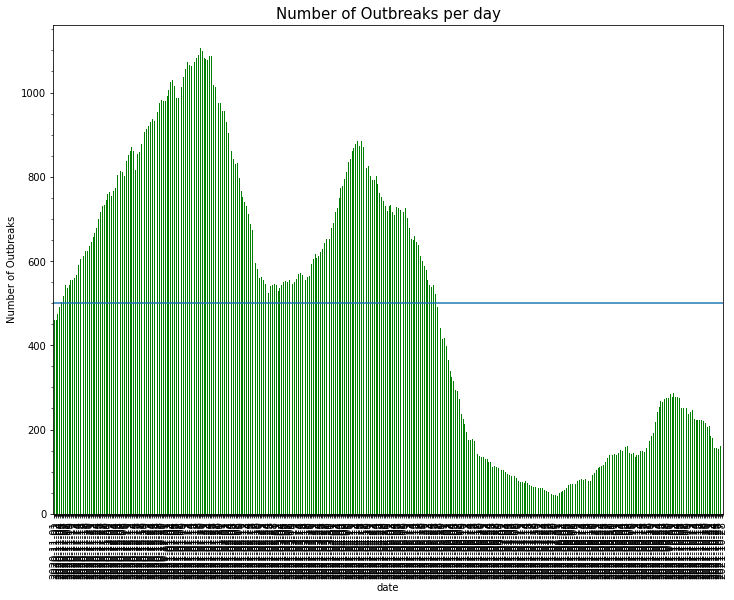

In [8]:
fig,ax= plt.subplots()

date.plot(kind="bar", ax=ax, color='g',figsize=(12,9))

plt.minorticks_on()
plt.tick_params(axis='x',which='minor',bottom='off')
plt.ylabel("Number of Outbreaks")#labelling axis
plt.xlabel("date")
plt.title("Number of Outbreaks per day", size=15)

# use axhline
plt.axhline(mean)

In [9]:
df.date = pd.to_datetime(df.date).dt.to_period('m')
month_date=df.groupby('date')['number_ongoing_outbreaks'].sum()
month_mean = month_date.mean()
month_mean


15082.25

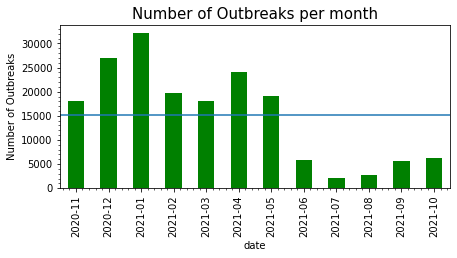

In [10]:
fig,ax= plt.subplots()

month_date.plot(kind="bar", ax=ax, color='g',figsize=(7,3))

plt.minorticks_on()
plt.tick_params(axis='x',which='minor',bottom='off')
plt.ylabel("Number of Outbreaks")#labelling axis
plt.xlabel("date")
plt.title("Number of Outbreaks per month", size=15)

# use axhline
plt.axhline(month_mean)

## Ans:
The blue line included in the graph above shows the average amount of cases per month which was 15082 covid infections per month. The first 7 months of outbreaks stayed above the monthy average and after that it dropped. 
The number of Cases started to increase from 2020-11 till 2021-01 ( 2 months) as after that the cases seemed to have significanlty drop.
From the data, a second wave is apparent as when rules started to get a bit lax, from 2021-03 till 2021-04 ( 1 month) cases started to uptrend
alot. From that point onwards, the monthly amount of cases significantly dropped. 


## 5.When did the number of outbreaks decrease?

In [11]:
print(month_mean)
decrease = month_date.diff()
decrease = decrease.sort_values()
decrease = decrease.head(1)
decrease


15082.25


date
2021-06   -13253.0
Freq: M, Name: number_ongoing_outbreaks, dtype: float64

## Ans: 
The number of outbreaks significantly dropped from 2021-05 - 2021-06 as the data suggests, there was a decrease of 13253 cases in 
June 2021 as from the previous month. From the graph in the previous question, it also suggests that this was after the second wave and the
bar graph trend suggests that the cases stayed releatively low afterwards compared to the months prior to June 2021 suggesting a decrease.

## 6.The province has been pushing the idea of having a “safe and normal” return to school this september, but has it really been? ( We will compare the average cases and see if there's any influx of cases since School opened)

In [12]:
#in this we will be comparing the trend of cases that occured due to school:
wow = ['Education']
school = df[df['outbreak_group'].str.contains('Education')]
school = school[school['outbreak_subgroup'].str.contains('School -')] #narrowing the search down to elementary, secondary, Post-Secondary
school.outbreak_subgroup.unique() #showing the different Sub category that we will be analyzing
post_secondary = school[school['outbreak_subgroup'].str.contains('School - Post-Secondary')] # level of education
post_secondary=post_secondary.groupby('date')['number_ongoing_outbreaks'].sum()
secondary = school[school['outbreak_subgroup'].str.contains('School - Secondary')]
secondary=secondary.groupby('date')['number_ongoing_outbreaks'].sum()
elementary = school[school['outbreak_subgroup'].str.contains('School - Elementary')]
elementary=elementary.groupby('date')['number_ongoing_outbreaks'].sum()
elementary_secondary = school[school['outbreak_subgroup'].str.contains('School - Elementary/Secondary')]
elementary_secondary=elementary_secondary.groupby('date')['number_ongoing_outbreaks'].sum()
all_schools = [post_secondary,secondary,elementary,elementary_secondary] # putting all levels of education into an array
print(type(post_secondary))

<class 'pandas.core.series.Series'>


<AxesSubplot:title={'center':'outbreaks at post secondary'}, xlabel='date', ylabel='cases'>

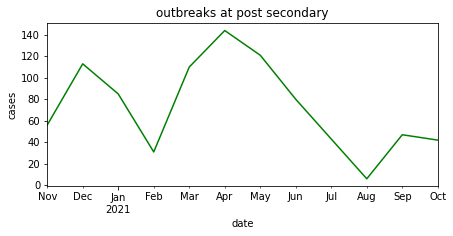

In [38]:

fig,ax= plt.subplots()
plt.title('outbreaks at post secondary')
plt.xlabel('date')
plt.ylabel('cases')
post_secondary.plot(kind="line", ax=ax, color='g',figsize=(7,3))

<AxesSubplot:title={'center':'outbreaks at secondary schools'}, xlabel='date', ylabel='cases'>

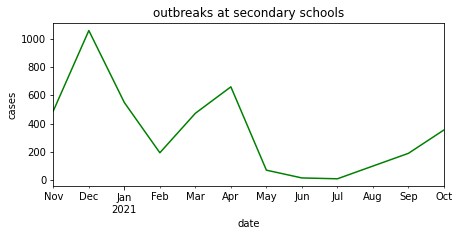

In [39]:

fig,ax= plt.subplots()
plt.title('outbreaks at secondary schools')
plt.xlabel('date')
plt.ylabel('cases')
secondary.plot(kind="line", ax=ax, color='g',figsize=(7,3))

<AxesSubplot:title={'center':'outbreaks at elementary schools'}, xlabel='date', ylabel='cases'>

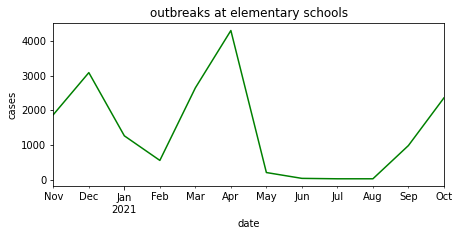

In [40]:
fig,ax= plt.subplots()
plt.title('outbreaks at elementary schools')
plt.xlabel('date')
plt.ylabel('cases')
elementary.plot(kind="line", ax=ax, color='g',figsize=(7,3))

<AxesSubplot:title={'center':'outbreaks at elementary/secondary schools'}, xlabel='date', ylabel='cases'>

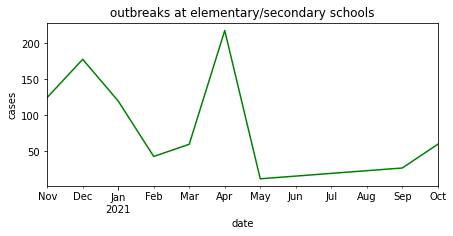

In [41]:
fig,ax= plt.subplots()
plt.title('outbreaks at elementary/secondary schools')
plt.xlabel('date')
plt.ylabel('cases')
elementary_secondary.plot(kind="line", ax=ax, color='g',figsize=(7,3))


In [17]:

#all_schools=all_schools.groupby('date')['number_ongoing_outbreaks'].sum()
#all_schools

In [18]:
df1=pd.DataFrame(post_secondary)
df2=pd.DataFrame(secondary)
df3=pd.DataFrame(elementary)
df4=pd.DataFrame(elementary_secondary)
df2

,number_ongoing_outbreaks
date,
2020-11,490
2020-12,1058
2021-01,549
2021-02,194
2021-03,473
2021-04,660
2021-05,71
2021-06,16
2021-07,10


In [19]:
df2.index

PeriodIndex(['2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
             '2021-05', '2021-06', '2021-07', '2021-09', '2021-10'],
            dtype='period[M]', name='date')

<Figure size 1080x576 with 0 Axes>

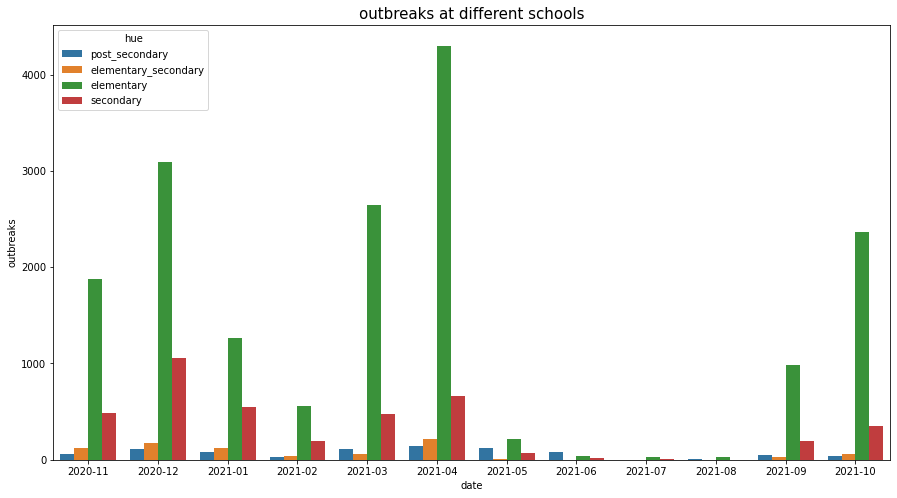

In [20]:
plt.figure(figsize=(15,8))

plt.figure(figsize=(15,8))
df1['hue']='post_secondary'
df2['hue']='secondary'
df3['hue']='elementary'
df4['hue']='elementary_secondary'
res=pd.concat([df1,df2,df3,df4]) #concatinating the dataframes
res['date']=res.index
res=res.sort_index()
sns.barplot(x='date',y='number_ongoing_outbreaks',data=res,hue='hue')
plt.ylabel("outbreaks")#labelling axis
plt.xlabel("date")
plt.title("outbreaks at different schools", size=15)
plt.show()

In [21]:
print(type(res))

<class 'pandas.core.frame.DataFrame'>


In [22]:
#new dataframe for comparing at once
#df1,df2,df3,df4
with_all=pd.DataFrame(post_secondary)
with_all.rename(columns={'number_ongoing_outbreaks':'post_secondary'}, inplace=True)
with_all['secondary'] =df2['number_ongoing_outbreaks']
with_all['elementary'] =df3['number_ongoing_outbreaks']
with_all['elementary_secondary'] =df4['number_ongoing_outbreaks']
with_all=with_all.fillna(0)
with_all

,post_secondary,secondary,elementary,elementary_secondary
date,,,,
2020-11,56,490.0,1878,125.0
2020-12,113,1058.0,3088,178.0
2021-01,85,549.0,1268,120.0
2021-02,31,194.0,560,43.0
2021-03,110,473.0,2649,60.0
2021-04,144,660.0,4300,218.0
2021-05,121,71.0,211,12.0
2021-06,80,16.0,43,0.0
2021-08,6,0.0,31,0.0


Our findings suggest that Elementary school students experienced the most breakouts compared to students in higher educations, this is because it is much harder to get kids to follow the social distancing protocal.
During April 2021, the province went into a second lockdown and schools remained close till upcoming year.

After carefully analyzing all the charts as well as the combined chart at the end. We have concluded that the push of a 'safe and normal' return to school did not hold up to its statement. When the province went into the second lockdown last school year, elementary schools experienced a peak of 4300 breakouts in April. Over the months of May 2021 - August 2021, Students at all levels of educations had less than 300 cases as the lockdown continued. When the government assured that it was safe to return to school, the cases started to rise. From August 2021 to September 2021 there was an increase of 3187% of cases among elementary students while other instituitions did not experience much. The following month received an increase of 238% from the previous amount and now the outbreaks stand at 2360.

The age group 0-14 makes 15.3%(link: https://www150.statcan.gc.ca/n1/daily-quotidien/210929/cg-d003-eng.htm) of Ontario's population. The average monthly cases across Ontario are 15,082 outbreaks a month. Onto our previous findings, elementary students made upto (2,360/15,082 X 100) 15.6% of the total cases. That number had gone up 238% from the previous month(6.5% ~ 988 cases from the average). Our findings suggest that ever since the government re-introduced in person learning, the cases amongst elementary students has been in an uptrend and has already reached 54% of last lockdowns all time highs. This goes onto prove that no, school has not been safe and these findings suggest that we might have more problems along the way, potentially as a 3rd lockdown.

### Now lets do some further analysis:

In [23]:
#Displaying all the age groups this dataset contains
second_df=second_df.fillna(0)
second_df.agegroup.unique()

array(['0-11yrs', '12-17yrs', '18-39yrs', '40-59yrs', '60-79yrs', '80+',
       'ALL'], dtype=object)

In [24]:
second_df

,date,agegroup,cases_unvac_rate_per100K,cases_partial_vac_rate_per100K,cases_full_vac_rate_per100K,cases_unvac_rate_7ma,cases_partial_vac_rate_7ma,cases_full_vac_rate_7ma
0,2021-09-13,0-11yrs,6.24,0.00,0.00,0.00,0.00,0.00
1,2021-09-13,12-17yrs,13.11,1.92,0.80,0.00,0.00,0.00
2,2021-09-13,18-39yrs,13.51,6.70,2.00,0.00,0.00,0.00
3,2021-09-13,40-59yrs,10.91,6.04,1.41,0.00,0.00,0.00
4,2021-09-13,60-79yrs,9.62,0.00,0.49,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
534,2021-11-28,18-39yrs,18.10,4.43,3.97,13.20,4.96,3.27
535,2021-11-28,40-59yrs,18.14,8.73,4.15,13.54,6.82,3.44
536,2021-11-28,60-79yrs,40.53,2.10,2.98,26.99,3.82,2.33
537,2021-11-28,80+,0.00,0.00,1.85,3.51,0.88,1.52


Categories: age group, cases amongst unvacinated rate ( per 100k), cases amongst partially vaccinated rate ( per 100k), cases amongst fully vacinated rate ( per 100k), cases amongst unvaccinated ( 7 day moving average), cases amongst partially vaccinated ( 7 day moving average), cases amongst fully vaccinated ( 7 day moving average).

The data is structured in the above categories, they are self explanatory. 7 day moving average refers to the mean of the categorys cases over the past 7 days ( this applies to all the categories that have the 7ma in them)


In [25]:

unvaccinated = second_df.groupby('agegroup')['cases_unvac_rate_per100K'].sum()
unvaccinated = unvaccinated.sort_values(ascending=True)
unvaccinated = unvaccinated.to_frame().reset_index()
unvaccinated.rename(columns={'cases_unvac_rate_per100K':'cases per 100k'}, inplace=True)
unvaccinated['vaccination status']='unvaccinated'
unvaccinated

,agegroup,cases per 100k,vaccination status
0,0-11yrs,449.30,unvaccinated
1,ALL,663.06,unvaccinated
2,40-59yrs,812.59,unvaccinated
3,18-39yrs,838.21,unvaccinated
4,12-17yrs,969.20,unvaccinated
5,60-79yrs,1268.44,unvaccinated
6,80+,7692.87,unvaccinated


In [26]:
part_vaccinated = second_df.groupby('agegroup')['cases_partial_vac_rate_per100K'].sum()
part_vaccinated = part_vaccinated.sort_values(ascending=True)
part_vaccinated = part_vaccinated.to_frame().reset_index()
part_vaccinated.rename(columns={'cases_partial_vac_rate_per100K':'cases per 100k'}, inplace=True)
part_vaccinated['vaccination status']='part_vaccinated'
part_vaccinated

,agegroup,cases per 100k,vaccination status
0,80+,100.26,part_vaccinated
1,60-79yrs,197.40,part_vaccinated
2,0-11yrs,267.49,part_vaccinated
3,ALL,297.82,part_vaccinated
4,12-17yrs,306.86,part_vaccinated
5,18-39yrs,310.09,part_vaccinated
6,40-59yrs,341.06,part_vaccinated


In [27]:
vaccinated = second_df.groupby('agegroup')['cases_full_vac_rate_per100K'].sum()
vaccinated = vaccinated.sort_values(ascending=True)
vaccinated = vaccinated.to_frame().reset_index()
vaccinated.rename(columns={'cases_full_vac_rate_per100K':'cases per 100k'}, inplace=True)
vaccinated['vaccination status']='vaccinated'
vaccinated

,agegroup,cases per 100k,vaccination status
0,0-11yrs,20.43,vaccinated
1,12-17yrs,71.42,vaccinated
2,60-79yrs,101.63,vaccinated
3,80+,107.85,vaccinated
4,ALL,131.73,vaccinated
5,40-59yrs,148.17,vaccinated
6,18-39yrs,158.17,vaccinated


In [28]:
combined = pd.concat([unvaccinated,part_vaccinated,vaccinated])
combined

,agegroup,cases per 100k,vaccination status
0,0-11yrs,449.30,unvaccinated
1,ALL,663.06,unvaccinated
2,40-59yrs,812.59,unvaccinated
3,18-39yrs,838.21,unvaccinated
4,12-17yrs,969.20,unvaccinated
5,60-79yrs,1268.44,unvaccinated
6,80+,7692.87,unvaccinated
0,80+,100.26,part_vaccinated
1,60-79yrs,197.40,part_vaccinated
2,0-11yrs,267.49,part_vaccinated


In [29]:


combined

,agegroup,cases per 100k,vaccination status
0,0-11yrs,449.30,unvaccinated
1,ALL,663.06,unvaccinated
2,40-59yrs,812.59,unvaccinated
3,18-39yrs,838.21,unvaccinated
4,12-17yrs,969.20,unvaccinated
5,60-79yrs,1268.44,unvaccinated
6,80+,7692.87,unvaccinated
0,80+,100.26,part_vaccinated
1,60-79yrs,197.40,part_vaccinated
2,0-11yrs,267.49,part_vaccinated


In [30]:
combined.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6], dtype='int64')

### What can we conclude from the data above?

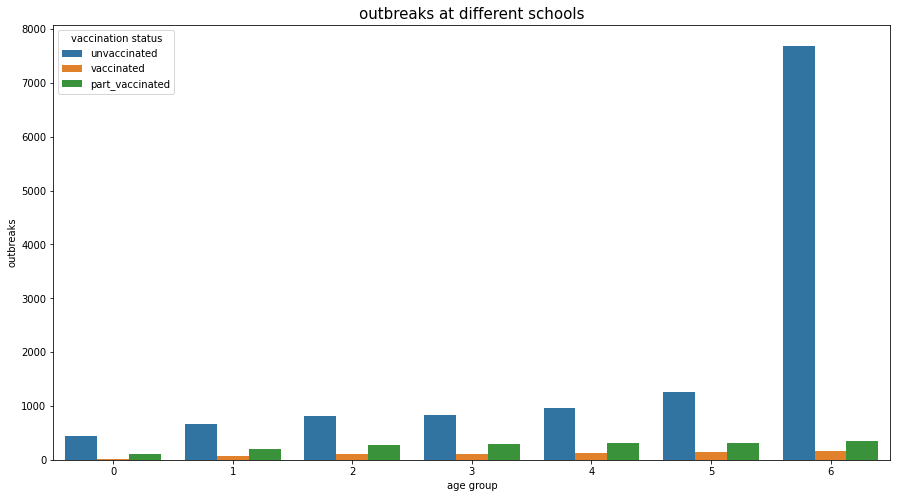

In [31]:
plt.figure(figsize=(15,8))
combined['agegroup']=combined.index
combined=combined.sort_index()
sns.barplot(x='agegroup',y='cases per 100k',data=combined,hue='vaccination status')
plt.ylabel("outbreaks")#labelling axis
plt.xlabel("age group")
plt.title("cases per vaccination status & age group", size=15)
plt.show()

0 = 0-11 yrs
1 = all yrs
2 = 40-59 yrs
3 = 18-39 yrs
4 = 12-17 yrs
5 = 60-79 yrs
6 = 80+ yrs

From the above graph it is apparent that unvaccinated elders are at most risk of catching covid, this is more likely because of their age and how as humans when we age, our immune system is weakened.
What is apparent from all the categories is that unvaccinated people are more likely to catch coivd. Our focus is mainly on Elementary kids returning to school so lets dive more deeply into it.

In [33]:
outbreaks_elementary = second_df[second_df['agegroup'].str.contains('0-11yrs')]
outbreaks_elementary_unvacc=outbreaks_elementary.groupby('date')['cases_unvac_rate_per100K'].sum()
outbreaks_elementary_part_vacc=outbreaks_elementary.groupby('date')['cases_partial_vac_rate_per100K'].sum()
outbreaks_elementary_full_vacc=outbreaks_elementary.groupby('date')['cases_full_vac_rate_per100K'].sum()
outbreaks_elementary_unvacc #showing the different Sub category that we will be analyzing

date
2021-09-13     6.24
2021-09-14     4.80
2021-09-15     4.75
2021-09-16     7.24
2021-09-17     6.58
              ...  
2021-11-24     8.60
2021-11-25     9.15
2021-11-26    12.67
2021-11-27    11.94
2021-11-28    12.28
Name: cases_unvac_rate_per100K, Length: 77, dtype: float64

<AxesSubplot:title={'center':'outbreaks rate for unvaccinated elementary students'}, xlabel='date', ylabel='percentage'>

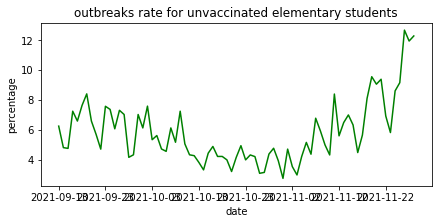

In [42]:
fig,ax= plt.subplots()
plt.title('outbreaks rate for unvaccinated elementary students')
plt.xlabel('date')
plt.ylabel('percentage')
outbreaks_elementary_unvacc.plot(kind="line", ax=ax, color='g',figsize=(7,3))

<AxesSubplot:title={'center':'outbreaks rate for partly vaccinated elementary students'}, xlabel='date', ylabel='percentage'>

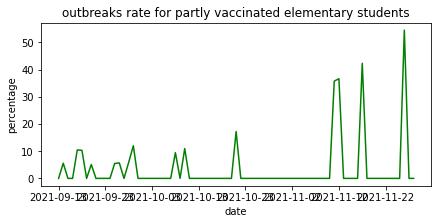

In [43]:
fig,ax= plt.subplots()
plt.title('outbreaks rate for partly vaccinated elementary students')
plt.xlabel('date')
plt.ylabel('percentage')
outbreaks_elementary_part_vacc.plot(kind="line", ax=ax, color='g',figsize=(7,3))

<AxesSubplot:title={'center':'outbreaks rate for vaccinated elementary students'}, xlabel='date', ylabel='percentage'>

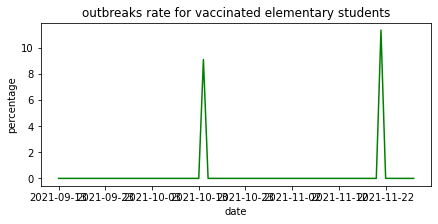

In [44]:
fig,ax= plt.subplots()
plt.title('outbreaks rate for vaccinated elementary students')
plt.xlabel('date')
plt.ylabel('percentage')
outbreaks_elementary_full_vacc.plot(kind="line", ax=ax, color='g',figsize=(7,3))

The dates for this dataset started from september 2021 till the end of November. This is sufficient for this research as we are analyzing covids behavior on elementary students as that is when the schools opened up. The findings from the graph above are quite fascinating as the results were not what we had in mind. The line graph for unvaccinated kids catching covid shows that there recently the cases percentage has been increasing

The second graph represents the percentage of cases per partly vaccinated. This is what we found interesting as it seems to have low volume and high spikes on certain days.
The least activity noted is for the kids that are fully vaccinated. 

These charts suggest that elementary school seems to be safe for those who are fully as they are not as likely to catch covid as the unvaccinated kids. 